In [1]:
import sys

In [2]:
# This installs the python library that is necessary to be able to easily and automatically retrieve the USGS water data
%pip install -U dataretrieval

Requirement already up-to-date: dataretrieval in c:\programdata\anaconda3\lib\site-packages (0.7)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Here are all the necessary packages to make sure that python can do all the things we want it too
from scipy import stats
import pandas as pd
import numpy as np

#from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import dataretrieval.nwis as nwis


In [4]:
#import dataretrieval.nwis as nwis

In [5]:
# In this cell, I am specifying the site that I want to pull data in for, I have a list below with all of the site numbers and 
# there reference names. This is so that we dont need more than 1 work book for each site. However, we will have to have an 
# idea of the first retreival date, as those will need changed with each run, an estimation is enough because we can get rid
# of any nan data. They are listed beside the sum number and names. The 'end' date is the most recent rate or the current day. 


# specify the USGS site code for which we want data.
site = '411605084240800' #site name - Upstream #2021-05-21,2021-06-21
#site = '411606084240800' #site name - Diversion #2021-09-01, 2021-06-21
#site = '411607084241200' #site name - Inflow/Pumps # 021-06-21, 021-06-21
#site = '411610084240800' #site name - Outflow #2021-09-01, 2021-06-21
#site = '411607084241201' #site name - Weather Station #2021- 09-01



# get instantaneous values (iv) ( i.e. gage height, discharge where applicable)
df = nwis.get_record(sites=site, service='iv', start='2021-05-21', end='2022-01-05')

# get water quality samples (qwdata) (all nutrient and SSC data found here)
df2 = nwis.get_record(sites=site, service='qwdata', start='2021-06-21', end='2021-12-15')

# get basic info about the site including long/lat data
df3 = nwis.get_record(sites=site, service='site')

In [6]:
#Basic information key cell - for any indexing problems
#00065 = gage height data 
#00060 = Discharge ft3/s
#p00600 = Total Nitrogen [nitrogen + Nitrate + ammonia + organic N]
#p00605 = Organic nitrogen
#p00608 = Ammonia [NH3 + NH4] as N
#p00625 = Ammonia + Organic N
#p00631 = Nitrate + Nitrite as N
#p00660 = Orthophosphate as PO4
#p00665 = Phosphorus as P
#p00671 = Orthophosphate as P
#p00940 = Chloride
#p71846 = Ammonia (NH3 + NH4) as NH4
#p80154 = Suspended Sediment Concentration

In [7]:
# Here is a check to make sure that the data is all pulling correctly, if these do not print out, reconfirm the date cell 5

print(df)
print(df2)
print (df3)

                               00065 00065_cd          site_no  99234 99234_cd
datetime                                                                      
2021-05-21T13:30:00.000-04:00  -0.01        P  411605084240800    NaN      NaN
2021-05-21T13:45:00.000-04:00  -0.01        P  411605084240800    NaN      NaN
2021-05-21T14:00:00.000-04:00  -0.01        P  411605084240800    NaN      NaN
2021-05-21T14:15:00.000-04:00  -0.01        P  411605084240800    NaN      NaN
2021-05-21T14:30:00.000-04:00  -0.01        P  411605084240800    NaN      NaN
...                              ...      ...              ...    ...      ...
2022-01-05T23:35:00.000-05:00   1.80        P  411605084240800    0.0        P
2022-01-05T23:40:00.000-05:00   1.80        P  411605084240800    0.0        P
2022-01-05T23:45:00.000-05:00   1.80        P  411605084240800    0.0        P
2022-01-05T23:50:00.000-05:00   1.80        P  411605084240800    0.0        P
2022-01-05T23:55:00.000-05:00   1.80        P  41160

In [8]:
#Here is where we are going to append all of this information to a series of dataframes for us to pull later
df.set_index(list(df)[0])

,00065_cd,site_no,99234,99234_cd
00065,,,,
-0.01,P,411605084240800,NaN,NaN
-0.01,P,411605084240800,NaN,NaN
-0.01,P,411605084240800,NaN,NaN
-0.01,P,411605084240800,NaN,NaN
-0.01,P,411605084240800,NaN,NaN
...,...,...,...,...
1.80,P,411605084240800,0.0,P
1.80,P,411605084240800,0.0,P
1.80,P,411605084240800,0.0,P


In [9]:
# starting with the basic information, get lists of all the column headers
display(list(df.columns.values))
display(list(df2.columns.values))
#display(list(df3.columns.values))

['00065', '00065_cd', 'site_no', '99234', '99234_cd']

['agency_cd',
 'site_no',
 'sample_end_dt',
 'sample_end_tm',
 'tm_datum_rlbty_cd',
 'coll_ent_cd',
 'medium_cd',
 'project_cd',
 'aqfr_cd',
 'tu_id',
 'body_part_id',
 'hyd_cond_cd',
 'samp_type_cd',
 'hyd_event_cd',
 'sample_lab_cm_txt',
 'p00600',
 'p00605',
 'p00608',
 'p00625',
 'p00631',
 'p00660',
 'p00665',
 'p00671',
 'p00940',
 'p71846',
 'p80154']

In [10]:
# starting with the basic information, get lists of all the column headers

# Remove unnecessary columns - we are going to broadly ignore the 3rd data frame as it is just holistic information
df.drop('99234', inplace=True, axis=1)
df.drop('99234_cd', inplace=True, axis=1)
df.drop('00065_cd', inplace=True, axis=1)

df2.drop(['agency_cd', 'site_no','sample_end_dt','sample_end_tm','tm_datum_rlbty_cd','coll_ent_cd','medium_cd','project_cd',
 'aqfr_cd','tu_id','body_part_id','hyd_cond_cd','samp_type_cd','hyd_event_cd','sample_lab_cm_txt'], inplace=True, axis = 1)

In [11]:
# double check that columns were dropped
display(list(df.columns.values))
display(list(df2.columns.values))
#display(list(df3.columns.values))

['00065', 'site_no']

['p00600',
 'p00605',
 'p00608',
 'p00625',
 'p00631',
 'p00660',
 'p00665',
 'p00671',
 'p00940',
 'p71846',
 'p80154']

In [18]:
df.rename(columns={'00065': 'gageH', 'site_no':'site_no'}, inplace=True)
df.dropna()


,gageH,site_no
datetime,,
2021-05-21T13:30:00.000-04:00,-0.01,411605084240800
2021-05-21T13:45:00.000-04:00,-0.01,411605084240800
2021-05-21T14:00:00.000-04:00,-0.01,411605084240800
2021-05-21T14:15:00.000-04:00,-0.01,411605084240800
2021-05-21T14:30:00.000-04:00,-0.01,411605084240800
...,...,...
2022-01-05T23:35:00.000-05:00,1.80,411605084240800
2022-01-05T23:40:00.000-05:00,1.80,411605084240800
2022-01-05T23:45:00.000-05:00,1.80,411605084240800


In [19]:
df['datetime'] = df.index

In [20]:
display(df)


,gageH,site_no,datetime
datetime,,,
2021-05-21T13:30:00.000-04:00,-0.01,411605084240800,2021-05-21T13:30:00.000-04:00
2021-05-21T13:45:00.000-04:00,-0.01,411605084240800,2021-05-21T13:45:00.000-04:00
2021-05-21T14:00:00.000-04:00,-0.01,411605084240800,2021-05-21T14:00:00.000-04:00
2021-05-21T14:15:00.000-04:00,-0.01,411605084240800,2021-05-21T14:15:00.000-04:00
2021-05-21T14:30:00.000-04:00,-0.01,411605084240800,2021-05-21T14:30:00.000-04:00
...,...,...,...
2022-01-05T23:35:00.000-05:00,1.80,411605084240800,2022-01-05T23:35:00.000-05:00
2022-01-05T23:40:00.000-05:00,1.80,411605084240800,2022-01-05T23:40:00.000-05:00
2022-01-05T23:45:00.000-05:00,1.80,411605084240800,2022-01-05T23:45:00.000-05:00


In [14]:
df2.rename(columns={ 'p00600': "totalnitrogen", 'p00605': "organicnitrogen",'p00608': "Ammonia_N", 
                    'p00625': "AmmoniaplusOrgNitro", 'p00631': "NitrateNitrite", 'p00660': "OrthoPhos_PO4",
                    'p00665': "PasP", 'p00671': "OrthoPasP", 'p00940': "Chloride", 'p71846': "ammoniaNH4",
                    'p80154': "SSC"}, inplace=True)
df2.dropna()

,totalnitrogen,organicnitrogen,Ammonia_N,AmmoniaplusOrgNitro,NitrateNitrite,OrthoPhos_PO4,PasP,OrthoPasP,Chloride,ammoniaNH4,SSC
datetime,,,,,,,,,,,
2021-06-21 22:55:00+00:00,28,3.20,1.08 @,4.32 @d,23.5,0.644,0.492 @d,0.210 @,15.8,1.390,98 @
2021-06-22 12:25:00+00:00,41,2.80,1.87 @,4.69 @,36.4,0.880,0.420 @,0.287 @,21.3,2.410,41 @
2021-06-23 15:55:00+00:00,32,2.30,1.15 @,3.43 @,28.3,0.558,0.271 @,0.182 @,22.1,1.480,13 @
2021-06-25 19:15:00+00:00,11,1.70,0.10 @,1.78 @d,9.0,0.494,0.439 @d,0.161 @,11.1,0.129,131 @
2021-06-25 23:45:00+00:00,16,2.70,0.61 @,3.27 @d,12.7,0.773,0.602 @d,0.252 @,12.8,0.786,155 @
2021-06-26 11:45:00+00:00,35,2.80,1.30 @,4.08 @d,31.1,0.598,0.367 @d,0.195 @,18.2,1.670,72 @
2021-06-26 22:30:00+00:00,33,2.70,1.27 @,3.97 @,28.9,0.583,0.314 @,0.190 @,19.2,1.640,51 @
2021-06-30 19:30:00+00:00,10,4.10,0.09 *,4.17 *@d,6.1 *,0.767,1.2 *@d,0.250 *,8.4 *,0.116,728 *@
2021-06-30 22:25:00+00:00,15,3.60,0.06 *,3.64 *@d,11.8 *,0.503,0.974 *@d,0.164 *,5.1 *,0.077,545 *@


In [15]:
# Here is the plotting code that spits out plots for gage height, discharge (where applicable), all nutrient data individually 
# and suspended sediment concentration

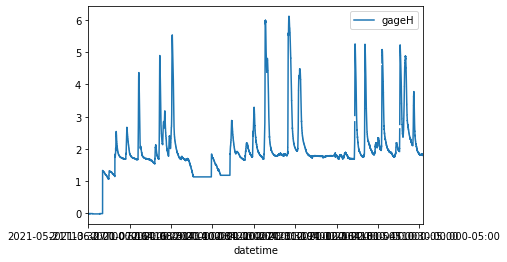

In [21]:
# For gage height plot: 
df.plot(x='datetime', y="gageH");